# 1. Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# 2. Tampilkan dataset

In [2]:
df = pd.read_csv('codelab5.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Lakukan EDA secukupnya

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
print("\nDuplicated Rows:")
duplicates = df.duplicated()
print(f"Number of duplicated rows: {duplicates.sum()}")
if duplicates.sum() > 0:
    print("\nDuplicated rows details:")
    df[duplicates]


Duplicated Rows:
Number of duplicated rows: 0


In [7]:
print("\nDuplicated Rows in CustomerID:")
duplicates = df.duplicated(subset=['CustomerID'])
print(f"Number of duplicated CustomerID: {duplicates.sum()}")
if duplicates.sum() > 0:
    print("\nDuplicated CustomerID details:")
    df[duplicates][['CustomerID']]


Duplicated Rows in CustomerID:
Number of duplicated CustomerID: 0


In [8]:
print("\nGender Distribution:")
df['Gender'].value_counts()


Gender Distribution:


Gender
Female    112
Male       88
Name: count, dtype: int64

In [9]:
print("\nCorrelation Matrix for Numerical Features:")
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
correlation_matrix = df[numerical_cols].corr()
correlation_matrix


Correlation Matrix for Numerical Features:


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [10]:
column_names = df.columns.tolist()
column_names

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# 4. Buat visualisasi data

In [11]:
os.makedirs('Visualisasi', exist_ok=True)

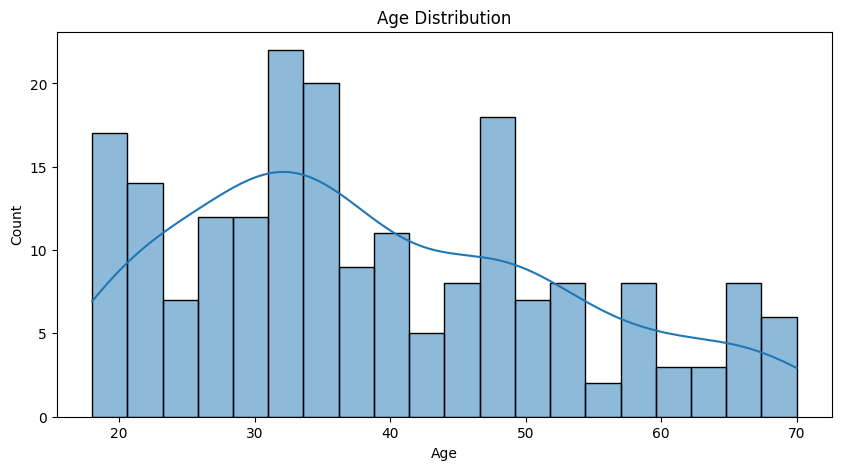

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.savefig('Visualisasi/age_distribution.png')
plt.show()
plt.close()

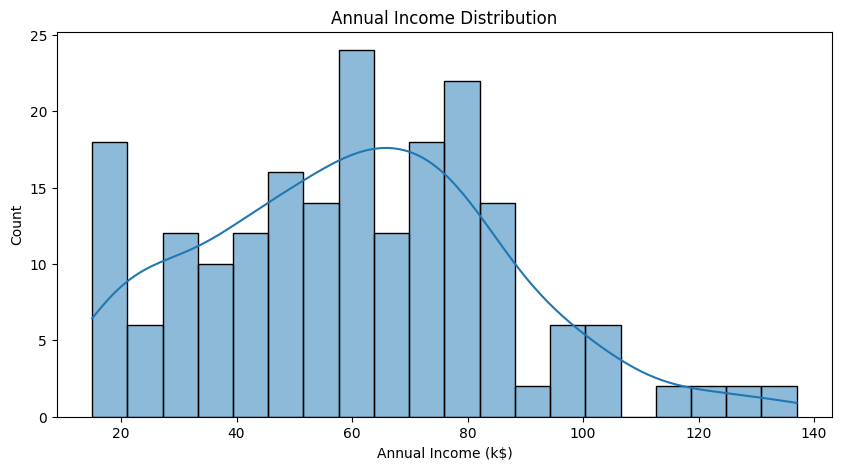

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.savefig('Visualisasi/income_distribution.png')
plt.show()
plt.close()

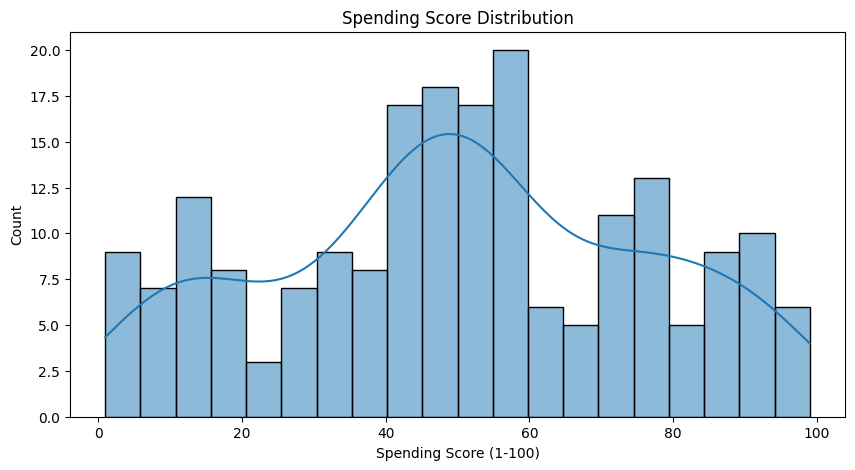

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.savefig('Visualisasi/spending_score_distribution.png')
plt.show()
plt.close()

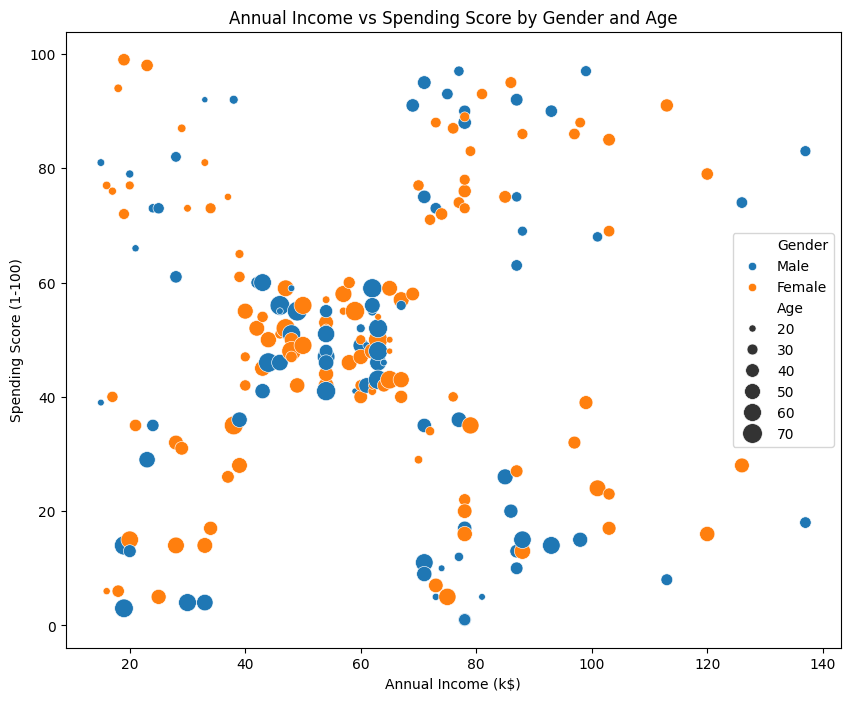

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Gender', size='Age', sizes=(20, 200))
plt.title('Annual Income vs Spending Score by Gender and Age')
plt.savefig('Visualisasi/scatter_plot.png')
plt.show()
plt.close()

# 5. Preprocessing Data

In [17]:
df_encoded = pd.get_dummies(df, columns=['Gender'], prefix='Gender', dtype=int)

In [18]:
print("DataFrame after one-hot encoding for Gender:")
df_encoded.head()

DataFrame after one-hot encoding for Gender:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [20]:
scaler = MinMaxScaler()
df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [ ]:
print("DataFrame after normalizing numerical features:")
df_encoded

DataFrame after normalizing numerical features:


,CustomerID,Age,Annual Income,Spending Score (1-100),Gender_Female,Gender_Male
0,1,0.019231,0.000000,0.387755,0,1
1,2,0.057692,0.000000,0.816327,0,1
2,3,0.038462,0.008197,0.051020,1,0
3,4,0.096154,0.008197,0.775510,1,0
4,5,0.250000,0.016393,0.397959,1,0
...,...,...,...,...,...,...
195,196,0.326923,0.860656,0.795918,1,0
196,197,0.519231,0.909836,0.275510,1,0
197,198,0.269231,0.909836,0.744898,0,1
198,199,0.269231,1.000000,0.173469,0,1


In [21]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']
X = df_encoded[features]

In [22]:
print("Selected features for clustering (X):")
X.head()

Selected features for clustering (X):


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.019231,0.000000,0.387755,0,1
1,0.057692,0.000000,0.816327,0,1
2,0.038462,0.008197,0.051020,1,0
3,0.096154,0.008197,0.775510,1,0
4,0.250000,0.016393,0.397959,1,0


# 6. Penerapan K-Means

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

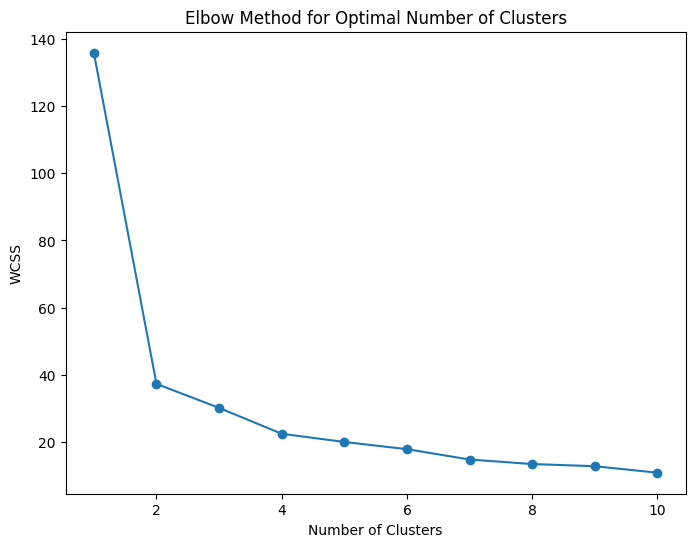

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_plot.png')
plt.show()
plt.close()

In [28]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

In [29]:
df['Cluster'] = cluster_labels

# 7. Interpretasi Kluster

In [30]:
os.makedirs('Clustering', exist_ok=True)

In [31]:
print("\nCluster Characteristics:")
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'count'],
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': lambda x: x.value_counts().to_dict()
}).round(2)
cluster_summary


Cluster Characteristics:


Age       Annual Income (k$) Spending Score (1-100)          Gender
          mean count               mean                   mean        <lambda>
Cluster                                                                       
0        52.44    43              62.02                  31.05    {'Male': 43}
1        48.11    55              58.82                  34.78  {'Female': 55}
2        28.44    57              59.67                  67.68  {'Female': 57}
3        33.28    18              87.11                  82.67    {'Male': 18}
4        24.04    27              45.96                  53.56    {'Male': 27}

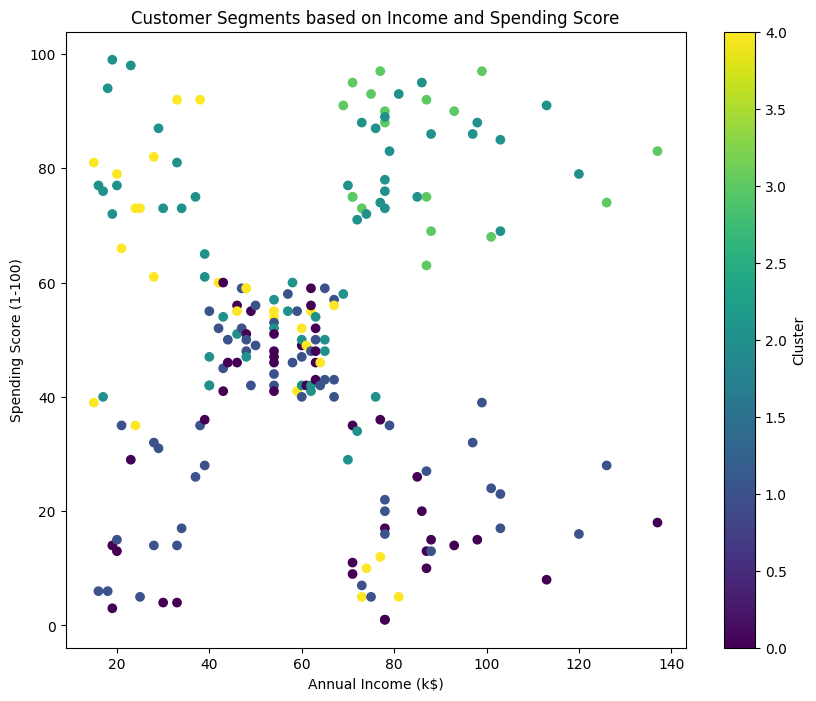

In [32]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Cluster'], cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.savefig('clustering/cluster_distribution.png')
plt.show()
plt.close()

In [34]:
print("\nDetailed Cluster Analysis:")
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Number of customers: {len(cluster_data)}")
    print(f"Average Age: {cluster_data['Age'].mean():.2f}")
    print(f"Average Annual Income: ${cluster_data['Annual Income (k$)'].mean():.2f}")
    print(f"Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.2f}")
    print(f"Gender Distribution: {cluster_data['Gender'].value_counts().to_dict()}")


Detailed Cluster Analysis:

Cluster 0:
Number of customers: 43
Average Age: 52.44
Average Annual Income: $62.02
Average Spending Score: 31.05
Gender Distribution: {'Male': 43}

Cluster 1:
Number of customers: 55
Average Age: 48.11
Average Annual Income: $58.82
Average Spending Score: 34.78
Gender Distribution: {'Female': 55}

Cluster 2:
Number of customers: 57
Average Age: 28.44
Average Annual Income: $59.67
Average Spending Score: 67.68
Gender Distribution: {'Female': 57}

Cluster 3:
Number of customers: 18
Average Age: 33.28
Average Annual Income: $87.11
Average Spending Score: 82.67
Gender Distribution: {'Male': 18}

Cluster 4:
Number of customers: 27
Average Age: 24.04
Average Annual Income: $45.96
Average Spending Score: 53.56
Gender Distribution: {'Male': 27}


# Kesimpulan

1. Kluster 0 : Pria, usia rata-rata 52.44, pendapatan 62.02, skor pengeluaran 31.05 (rendah). Kluster ini terdiri dari pria yang lebih tua dengan pendapatan sedang tetapi skor pengeluaran rendah.
2. Kluster 1 : Wanita, usia 48.11, pendapatan 58.82, skor pengeluaran 34.78 (rendah). Kluster ini berisi wanita paruh baya dengan pendapatan sedang dan skor pengeluaran rendah.
3. Kluster 2 : Wanita, usia 28.44, pendapatan 59.67, skor pengeluaran 67.68 (tinggi). Kluster ini terdiri dari wanita muda dengan pendapatan sedang dan skor pengeluaran tinggi.
4. Kluster 3 : Pria, usia 33.28, pendapatan 87.11, skor pengeluaran 82.67 (sangat tinggi). Kluster ini berisi pria muda dengan pendapatan tinggi dan skor pengeluaran sangat tinggi.
5. Kluster 4 : Pria, usia 24.04, pendapatan 49.96, skor pengeluaran 53.56 (sedang).Kluster ini terdiri dari pria yang sangat muda dengan pendapatan sedang dan skor pengeluaran sedang.